In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


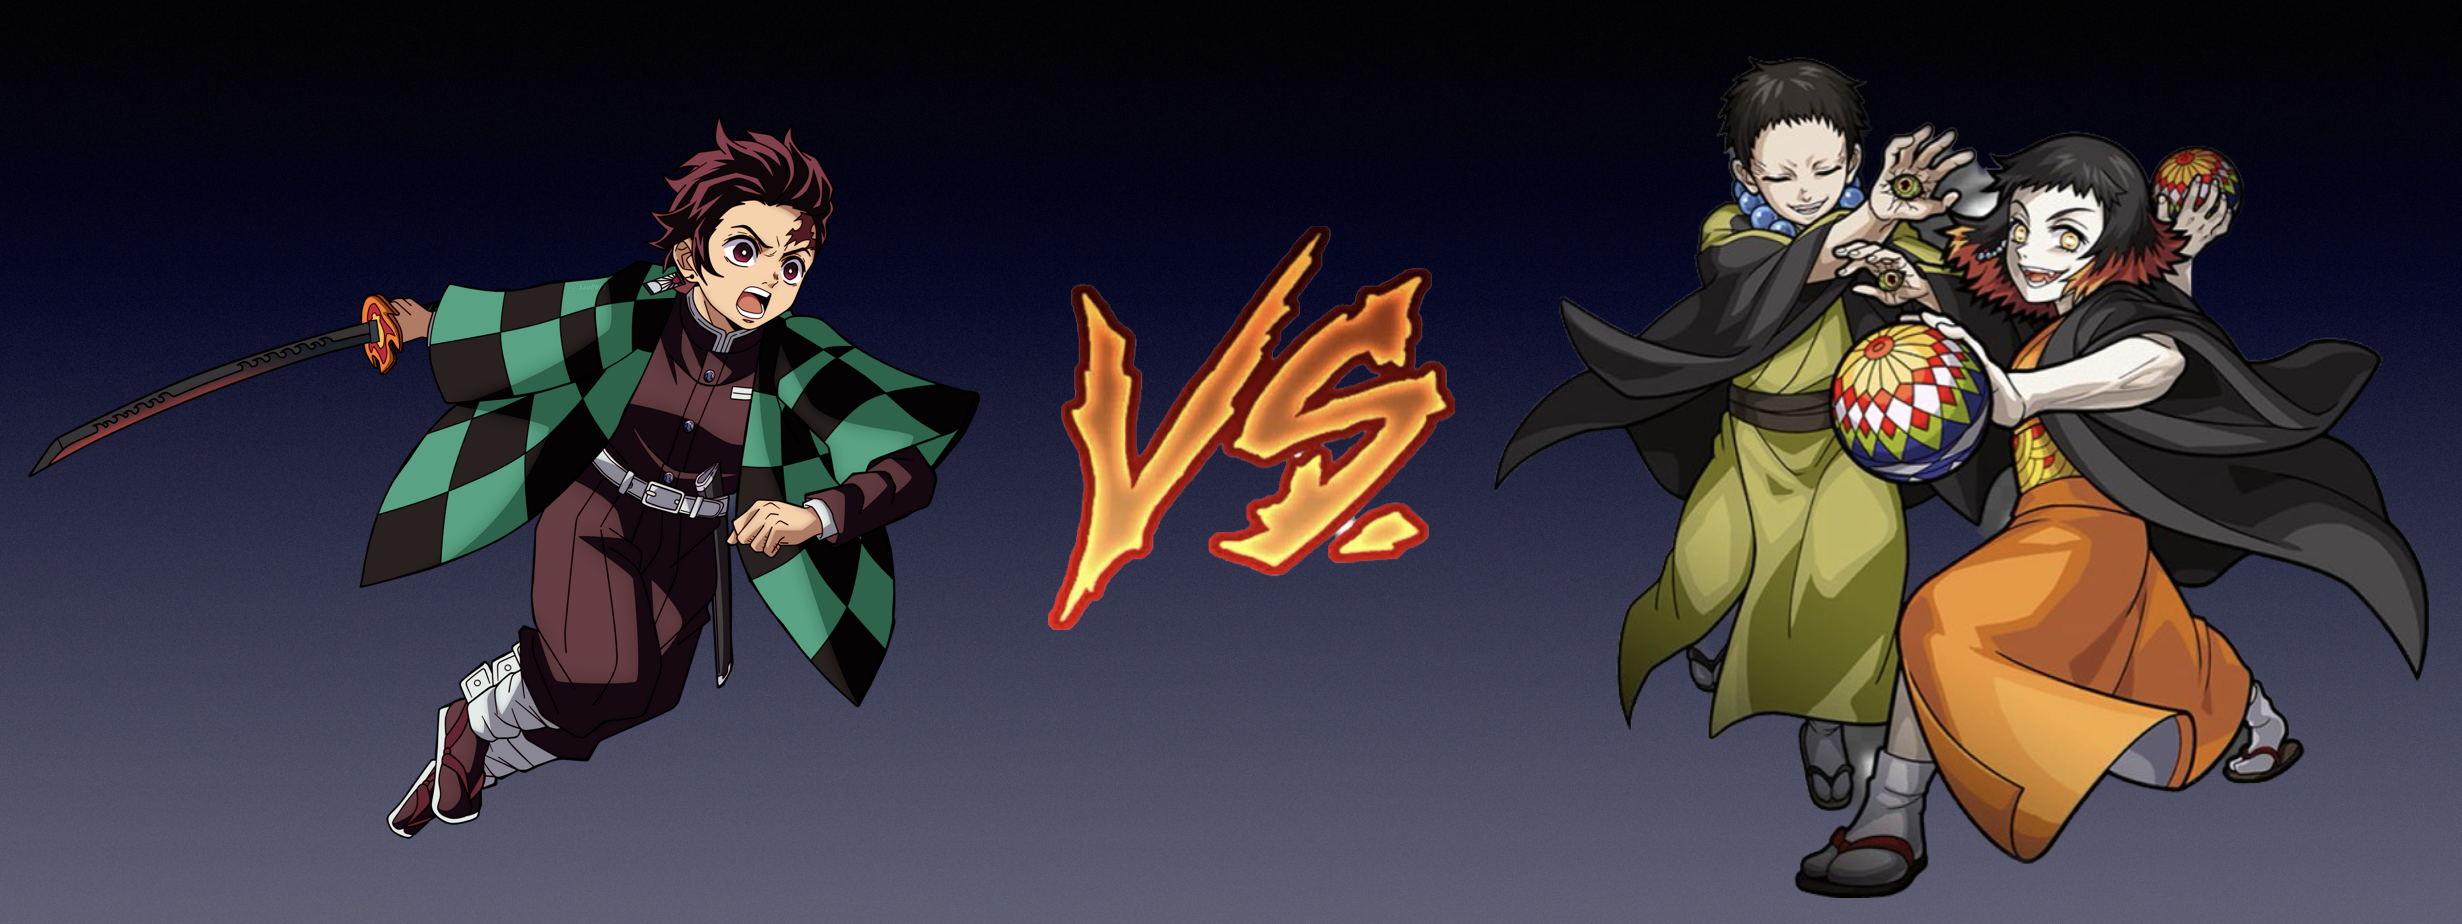

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/KNY.xlsx")



In [3]:
datos.head()

Name  Strength  Lethality         clase  Class
0  Tanjiro        15         12  Demon Killer      1
1   Nezuko        10          8         Demon      0
2    Muzan        20         20         Demon      0
3     Giyu        18         14  Demon Killer      1
4      Rui        16         16         Demon      0

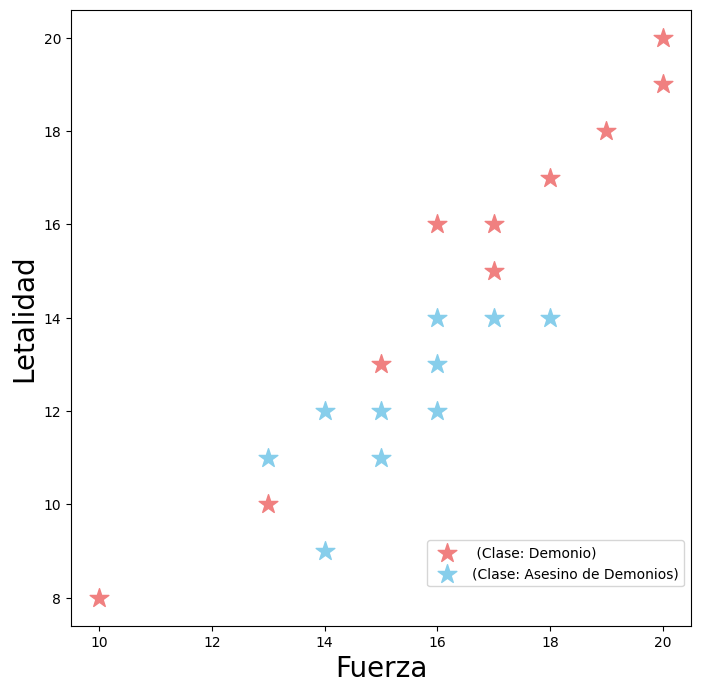

In [4]:
demonios = datos[datos["Class"]==0]
demonSlayer = datos[datos["Class"]==1]

plt.figure(figsize=(8, 8))
plt.xlabel('Fuerza', fontsize = 20.0)
plt.ylabel('Letalidad', fontsize = 20.0)
plt.scatter(demonios["Strength"], demonios["Lethality"], 
            label=" (Clase: Demonio)", marker="*", c="lightcoral", s=200)
plt.scatter(demonSlayer["Strength"], demonSlayer["Lethality"],
            label="(Clase: Asesino de Demonios)", marker="*", c="skyblue", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

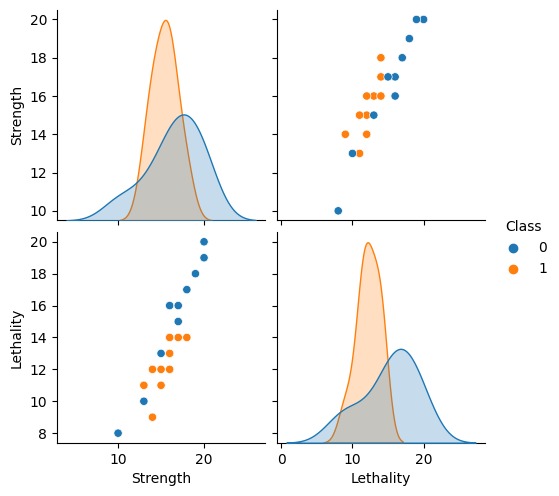

In [5]:
sns.pairplot(datos, hue='Class')

In [ ]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    datos[["Strength", "Lethality"]],
    datos['Class'], 
    test_size=0.30)


0.4


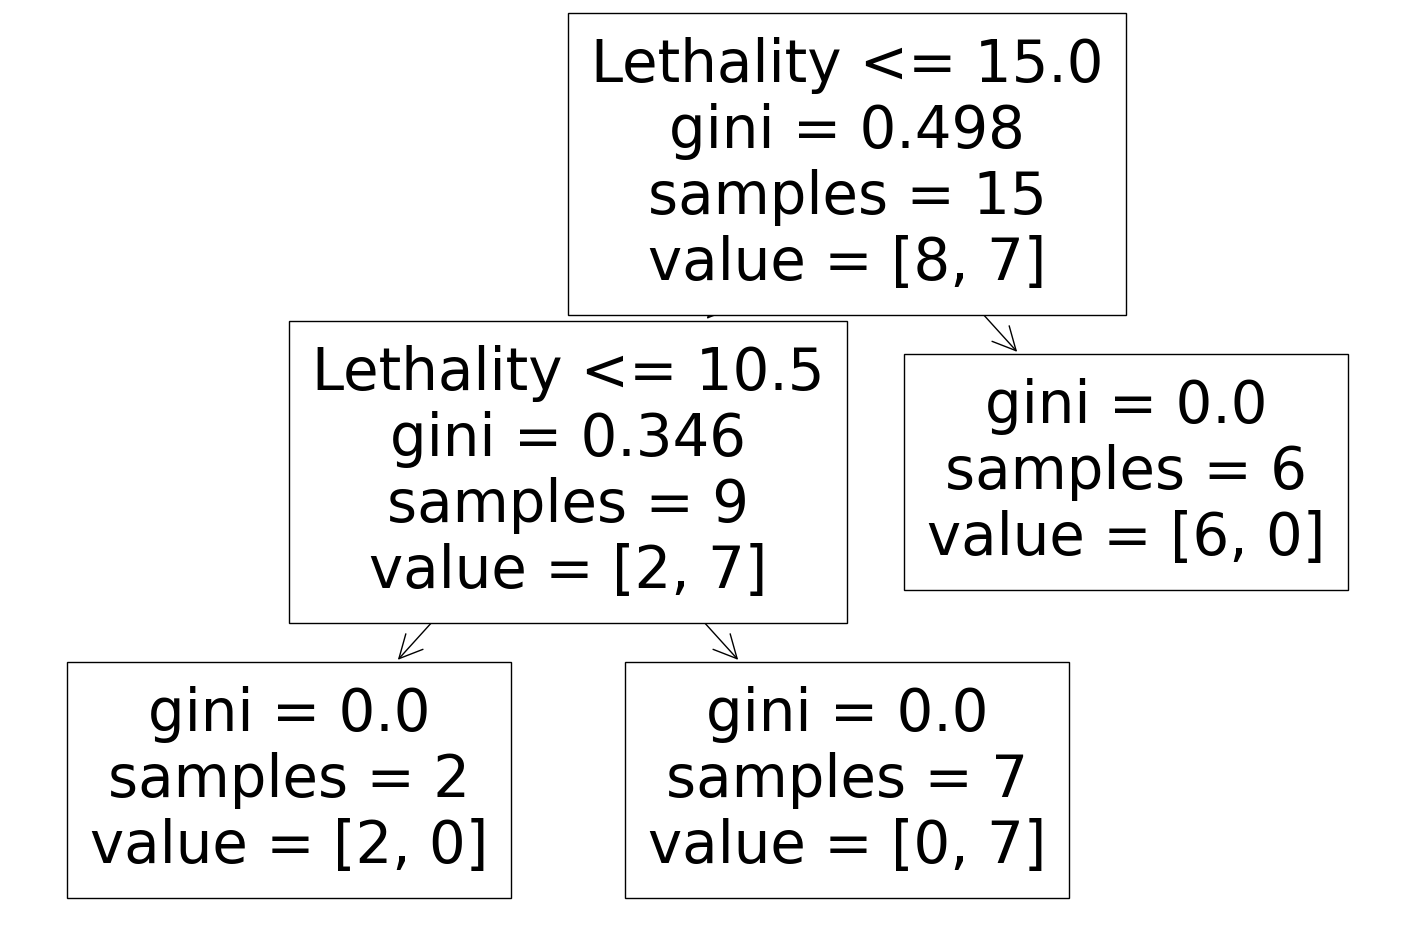

In [7]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="gini")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

#print(tree.export_text(arbol,feature_names=["Strength", "Lethality"]))
plt.figure(figsize=(18 , 12))
tree.plot_tree(arbol, 
              feature_names=["Strength", "Lethality"])
plt.show()

In [ ]:
def clasi(fuerza,letalidad):
  clasifica=arbol_decision.predict([[str(fuerza), str(letalidad)]])
  return bool(clasifica)

clasificacion=0
opcion=''
while opcion.upper() !='N':
  nombre=str(input("Ingrese el nombre del personaje a evaluar : "))
  fuerza=int(input(f"por favor ingrese la fuerza de {nombre} : "))
  letalidad= int(input(f"por favor ingrese el nivel de letalidad de {nombre} : "))
  clasificacion=clasi(str(fuerza), str(letalidad))
  print((clasificacion))
  opcion=str(input('Dese ingresar otro paciente S/N'))
